# Bayesian Reasoning

In [9]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
grandparent_directory = os.path.join(os.pardir, os.pardir)
module_path = os.path.abspath(grandparent_directory)
sys.path.append(module_path)
from src.piApprox import pi_approx
import src.monty_hall as mh

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## A Philosophical Note

Philosophers wonder about the best way to understand what probabilities are. The main division is between those who want to understand probabilities _objectively_ and those who want to understand probabilities _subjectively_.

### Historical Relevance
In the early twentieth century, the quantum theory being developed by physicists was saying that the location (etc.) of a particle could be represented by a probabilistic wave function that gave probabilities for the particle to be in one place rather than another. And this question of how to understand these probabilities reared its head. Albert Einstein argued that they could only be interpreted subjectively, but the dominant interpretation today is that there is a kind of indeterminacy in the universe itself.

### Objective Probability
The paradigmatic theory of _objective_ probability is frequentism, which says that probabilities are a measure of the long-run behvior of physical systems. To say that a die has a 1/6 chance of coming up "6" when tossed, for example, is to say that, in the long run as the number of tosses increases without bound, the number of "6"s rolled will constitute one sixth of all tosses.

On this point of view, **we cannot speak meaningfully of the probability of a single event**. Once a die has been rolled, there is no non-trivial probability of its having come up "6" or not. Either it did (in which case the probability is 1) or it did not (in which case the probability is 0).

Similarly, **we cannot speak meaningfully of the probability of a parameter having a certain value, or of a hypothesis being true**. The frequentist will reject the idea of a (meaningful) probability of a die being unfairly weighted. Either it is or it is not.


### Subjective Probability
The paradigmatic theory of _subjective_ probability is Bayesianism, which says that probabilities are better understood as rational _degrees of belief_. The standard of rationality is necessary here to assure that these degrees of belief will conform to the probability calculus.

If probabilities are degrees of belief, then it _does_ make sense to apply them to parameters or to hypotheses. The probability of a die being unfairly weighted would simply represent what it would be rational to believe about the die with respect to its being weighted or not.

Now: Crucially, what it is rational to believe about the die with respect to its being weighted or not _is a function of what we know about the die!_

In particular, if we gain the evidence (or knowledge) that the die has been rolled 100 times and come up "5" 90 times, then this would have (or, rather, *ought, rationally, to have*) a significant impact on our degree of belief with respect to the weightedness of the die. This is the sort of idea that Thomas Bayes had.

## Review

__Prior p(H):__ Our prior reflects what we know about the value of some parameter before seeing data.  This could refer to previous trials and distributions.

__Likelihood p(D|H)__: what is the plausibility that our data is observed, given our prior?

__Posterior p(H|D):__ This is result of the Bayesian analysis and reflects all that we know about a problem (given our data and model).

__Evidence p(D):__ Evidence is the probability of observing the data averaged over all the possible values the parameters can take. Also knowns as the noramlziing factor. The normalising constant makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is equal to 1.

Because p(D) is considered a normalizing constant we can say: $p(H|D) \propto p(D|H) * p(H)$

## A Famous Example

Suppose some rare disease affects 1 in 100,000 people. There is a test for it, though it is imperfect: 5% of the people who have the disease will test negative and 4% of the people who don't have the disease will test positive for it. You take the test and test positive. Before the test the probability that you had the disease was only 1 in 100,000. But now, with this new information of the positive test, how should you judge the probability that you have the disease?

We can use Bayes's Theorem:

$\huge P(H | D) = \frac{P(D | H)P(H)}{P(D)}$.

What are $H$ and $D$ in this case?

To calculate the denominator, we'll need to make use of the **Rule of Total Evidence**: <br/><br/>
$\large P(D) = P(D | H_1)P(H_1) + ... + P(D | H_n)P(H_n)$

In our case, there are only two possibilities: Either I have the disease or I do not.

In [27]:
(0.00001 * 0.95) / (0.00001 * 0.95 + 0.04 * 0.99999)

0.00023744598103931353

The probability that I have the disease is still less than 1 in 4000!

## The Monty Hall Problem

Bayesian reasoning applies naturally and neatly to the famous Monty Hall Problem.

The situation is this: Monty Hall, classic and original host of the TV game show "Let's Make a Deal", has told you, the contestant, that there is some fantastic prize behind one of three curtains. Suppose, without loss of generality, that you select Door \#1.

Now here's where the story gets interesting. Hall then shows you that the prize is NOT behind one of the other two curtains. Let's suppose, again without loss of generality he opens Door \#2.

Note a few things at this point:

1. Hall will never show you what's behind the door you selected.
2. Hall will never show you where the good prize is.
3. \#1 and \#2 notwithstanding, Hall will always be able to show you what's behind one of the doors without revealing where the prize is.

Then Hall asks you if you'd like to *switch* your pick to the remaining door.

The question is: Do you have any reason to switch? Or do you have any reason to stick with your original choice?

It is natural to reason in the following way: Either the prize is behind Door \#1, the one I picked, or it is behind Door \#3. Clearly, the fact that Hall opened Door \#2 could not have had any effect on the location of the prize, so there is no reason to prefer Door \#1 or Door \#3. So the probability that the prize is behind either of the two remaining doors is 50%.

But this reasoning is wrong! The fallaciousness of this reasoning was pointed out in a magazine column in the 1980s, although the writer of the column received much criticism from many "experts" who were arguing that the reasoning was perfectly sound. (There's a nice article about the history here: https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/.)

The truth is that you ought to switch! The truth is that, while there is only 1 chance in 3 that the door you originally selected has the prize, there are 2 chances in 3 that the other door has the prize.

Let's see if we can proceed through this puzzle in Bayesian terms.

### Posterior Probability that the Prize Is Behind Your Door
Let's calculate the posterior probability that the prize is behind Door \#1, given the evidence that Hall shows you that it is not behind Door \#2:

What is the *prior* probability that the prize is behind Door \#1?

In [28]:
prior_1 = 1/3
prior_1

0.3333333333333333

Now let's consider the likelihood of the evidence: What is the probability that Hall would show you that it is not behind Door \#2, given the hypothesis that the prize is behind Door \#1?

In [29]:
likelihood_1 = 0.5
likelihood_1

0.5

Finally, let's calculate the probability of the evidence itself:

There are three salient hypotheses to consider:

- $H_1$: The prize is behind Door \#1.
- $H_2$: The prize is behind Door \#2.
- $H_3$: The prize is behind Door \#3.

And our evidence is:

- $D$: Hall shows you that the prize is not behind Door \#2.

We can calculate the probability as follows:

$P(D) = P(D | H_1)\times P(H_1) + P(D | H_2)\times P(H_2) + P(D | H_3)\times P(H_3)$.

We've already made the calculation for the first term:

$P(D | H_1)\times P(H_1) = \frac{1}{2}\times\frac{1}{3} = \frac{1}{6}$.

Now:

The probability that Hall would show you Door \#2, given that the prize is behind Door \#2, is *zero*. (This is by the rules of the game.)

The probability that Hall would show you Door \#2, given that the prize is behind Door \#3, is *one*. (Here Hall's hand would be forced, since he can, by the rules, show you neither the door that you chose (\#1) nor the door with the prize (\#3).)

So we have:

$P(D) = \frac{1}{2}\times\frac{1}{3} + (0)\times\frac{1}{3} + (1)\times\frac{1}{3} = \frac{1}{2}$.

We are finally in a position to calculate the posterior! We have:

$\large P(H_1 | D) = \frac{P(D | H_1)\times P(H)}{P(D)} = \frac{1 / 6}{1 / 2} = \frac{1}{3}$.

That is, our updated probability that the prize is behind Door \#1 is just the same as the prior. It's still just $\frac{1}{3}$.

### Posterior Probability that the Prize Is Behind the Other Door

The posterior probability that the prize is behind Door \#3, given the evidence that Hall has shown you what's behind Door \#2, ought to work out to $\frac{2}{3}$. Let's verify this:

What is the *prior* probability that the prize is behind Door \#3?

In [5]:
prior_3 = 1/3
prior_3

0.3333333333333333

Now the likelihood: What's the probability that Hall would show you Door \#2, given that the prize is behind Door \#3?

In [6]:
likelihood_3 = 1
likelihood_3

1

We've already made our calculation of the evidence. From before we had:

$P(D) = \frac{1}{2}\times\frac{1}{3} + (0)\times\frac{1}{3} + (1)\times\frac{1}{3} = \frac{1}{2}$.

So now we are in a position to calculate the posterior probability that the prize is behind Door \#3. We have:

$\large P(H_3 | D) = \frac{P(D | H_3)\times P(H)}{P(D)} = \frac{1 / 3}{1 / 2} = \frac{2}{3}$.

Given that Hall shows us what's behind Door \#2, we should now update our degree of belief that the prize is behind Door \#3 to $\frac{2}{3}$!

### Let's use `monty_hall.py`!

In [35]:
mh.play_mh()

Monty reveals a goat behind Door #3
Do you wish to swap to Door #2?
y or n: n
You open Door #1 and . . . you win a goat :(


0

In [36]:
mh.stats_mh()

0

In [37]:
swapping = []
not_swapping = []
for _ in range(100000):
    swapping.append(mh.stats_mh(swap=True))
    not_swapping.append(mh.stats_mh(swap=False))
print(sum(swapping) / 100000)
print(sum(not_swapping) / 100000)

0.67076
0.33236


# Bayesian Statistics

### Puppy Questions

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.


#### 1) What is the probability of Thomas getting a small puppy?

In [ ]:
# Your answer here.  Write out your process in addition to your final numeric answer.

#### 2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?

In [ ]:
# Your answer here.  Write out your process in addition to your final numeric answer.

### Med Question

A medical test is designed to diagnose a certain disease. The test has a false positive rate of 10%, meaning that 10% of people without the disease will get a positive test result. The test has a false negative rate of 2%, meaning that 2% of people with the disease will get a negative result. Only 1% of the population has this disease.


#### 3) If a patient receives a positive test result, what is the probability that they actually have the disease? Show how you arrive at your answer.

In [ ]:
# Your answer here.  Write out your process in addition to your final numeric answer.

# Bayesian Inference

## Flatiron IQ Scores

We have a prior belief, based on previous studies, that the IQ of Flatiron Students is normally distributed with a mean IQ of 100 and a standard deviation of 10.

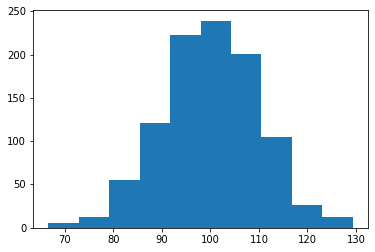

In [40]:
prior_distribution = np.random.normal(100, 10, 1000)
plt.hist(prior_distribution);

We then take a random sample of student IQs. Our sample is normally distributed with a mean of 115 and standard deviation of 7.5. From this, we can construct a posterior distribution. 

In order to do this, we update our prior by updating the mean and variance each observation.

The equations for our updated prior mean and variance are:

$$Updated\ Prior\ Mean = \frac{\sigma^2_{observed}\mu + \sigma_{prior}^2x}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

$$Updated\ Prior\ Variance = \frac{\sigma_{observed}^2\sigma_{prior}^2}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

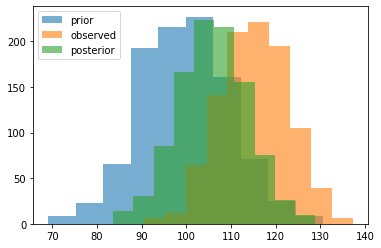

In [108]:
def update_prior(prior, observed):
    means = [prior.mean()] * len(observed)
    variations = [prior.var()] * len(observed)
    for i in range(len(observed)):
        means[i] = (variations[i]*observed[i] + observed.var(ddof=i)*means[i] )/(variations[i]+observed.var(ddof=i))
        variations[i] = ((variations[i]*observed.var(ddof=i))/(variations[i]+observed.var(ddof=i)))
        
    posterior = np.random.normal(np.mean(means), np.mean(variations)**.5, 1000)
    
    return posterior

prior = np.random.normal(100, 10, 1000)
observed = np.random.normal(115, 7.5, 1000)
posterior = update_prior(prior, observed)

plt.hist(prior, label='prior', alpha=.6)
plt.hist(observed, label='observed', alpha = 0.6)
plt.hist(posterior,label='posterior', alpha = 0.6)
plt.legend()

In [96]:
def subplot_map(iteration, number_of_columns):
    return iteration//number_of_columns, iteration%number_of_columns

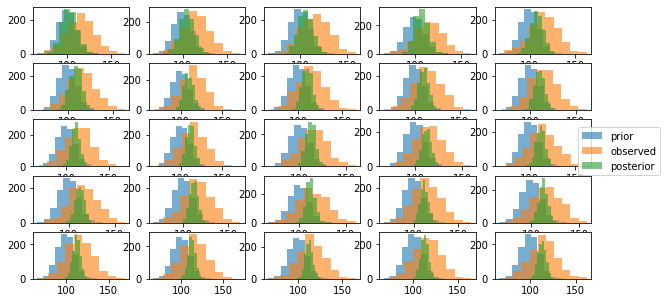

In [111]:
fig, axes = plt.subplots(5,5, figsize=(10,5))
population = np.random.normal(115, 15, 10000)
prior = np.random.normal(100, 10, 1000)
for i in range(25):
    observed = np.random.choice(population, 1000)
    if i == 0:
        posterior = update_prior(prior, observed)
    else:
        posterior = update_prior(posterior, observed)
    row, column = subplot_map(i, 5)
    axes[row,column].hist(prior, label='prior', alpha=.6)
    axes[row,column].hist(observed, label='observed', alpha = 0.6)
    axes[row,column].hist(posterior,label='posterior', alpha = 0.6)
handles, labels = axes[row,column].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right');